In [19]:
!gdown --id 16MIleqoIr1vYxlGk4GKnGmrsCPuWkkpT



C:\Python312\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16MIleqoIr1vYxlGk4GKnGmrsCPuWkkpT
To: c:\Users\Plugify\Documents\pessoal\faculdade\Tópicos\Trabalho2\ECG5000.zip

  0%|          | 0.00/10.6M [00:00<?, ?B/s]
  5%|▍         | 524k/10.6M [00:00<00:05, 2.00MB/s]
 20%|█▉        | 2.10M/10.6M [00:00<00:01, 5.92MB/s]
 44%|████▍     | 4.72M/10.6M [00:00<00:00, 11.9MB/s]
 84%|████████▍ | 8.91M/10.6M [00:00<00:00, 20.1MB/s]
100%|██████████| 10.6M/10.6M [00:00<00:00, 16.1MB/s]


In [20]:
import zipfile
import os

# Caminho para o arquivo zip
zip_file_path = 'ECG5000.zip'  # Altere para o caminho correto se necessário
# Diretório de destino onde os arquivos serão extraídos
extraction_path = 'ECG5000_extracted'  # Nome da pasta para extração

# Cria o diretório de extração se não existir
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Descompacta o arquivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f'Arquivo descompactado em: {extraction_path}')


Arquivo descompactado em: ECG5000_extracted


In [21]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
import pandas as pd
from scipy.io import arff

# Carregar os dados de treino
train_data = arff.loadarff('ECG5000_extracted/ECG5000_TRAIN.arff')
train = pd.DataFrame(train_data[0])  # Converte para DataFrame

# Carregar os dados de teste
test_data = arff.loadarff('ECG5000_extracted/ECG5000_TEST.arff')
test = pd.DataFrame(test_data[0])  # Converte para DataFrame

# Junta os DataFrames de treino e teste
df = pd.concat([train, test])

# Embaralha as linhas do DataFrame
df = df.sample(frac=1.0)

# Exibe a forma do DataFrame
print(df.shape)  # Deve exibir (5000, 141) se tudo estiver correto


(5000, 141)


In [23]:
CLASS_NORMAL = 1
class_names = ['Normal','R on T','PVC','SP','UB']

In [24]:
new_columns = list(df.columns)
new_columns[-1] = 'target'
df.columns = new_columns
df.target.value_counts()

target
b'1'    2919
b'2'    1767
b'4'     194
b'3'      96
b'5'      24
Name: count, dtype: int64

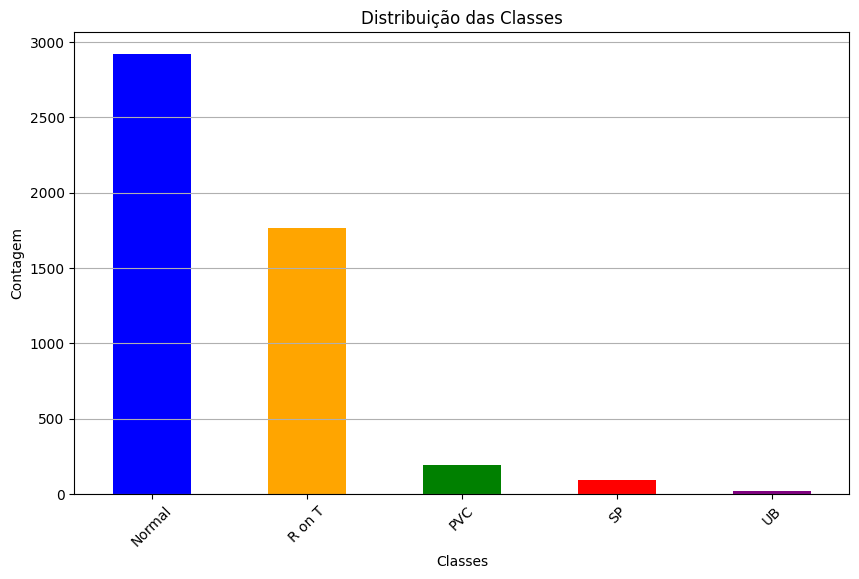

In [25]:
import matplotlib.pyplot as plt

# Contar as ocorrências de cada classe na coluna target
class_counts = df.target.value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple']
class_counts.plot(kind='bar', color=colors)

plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)

plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [26]:
def plot_time_series_class(data, class_name, ax, n_steps=10):
  time_series_df = df.target.value_counts()


  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(smooth_path, linewidth=2)
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(class_name)

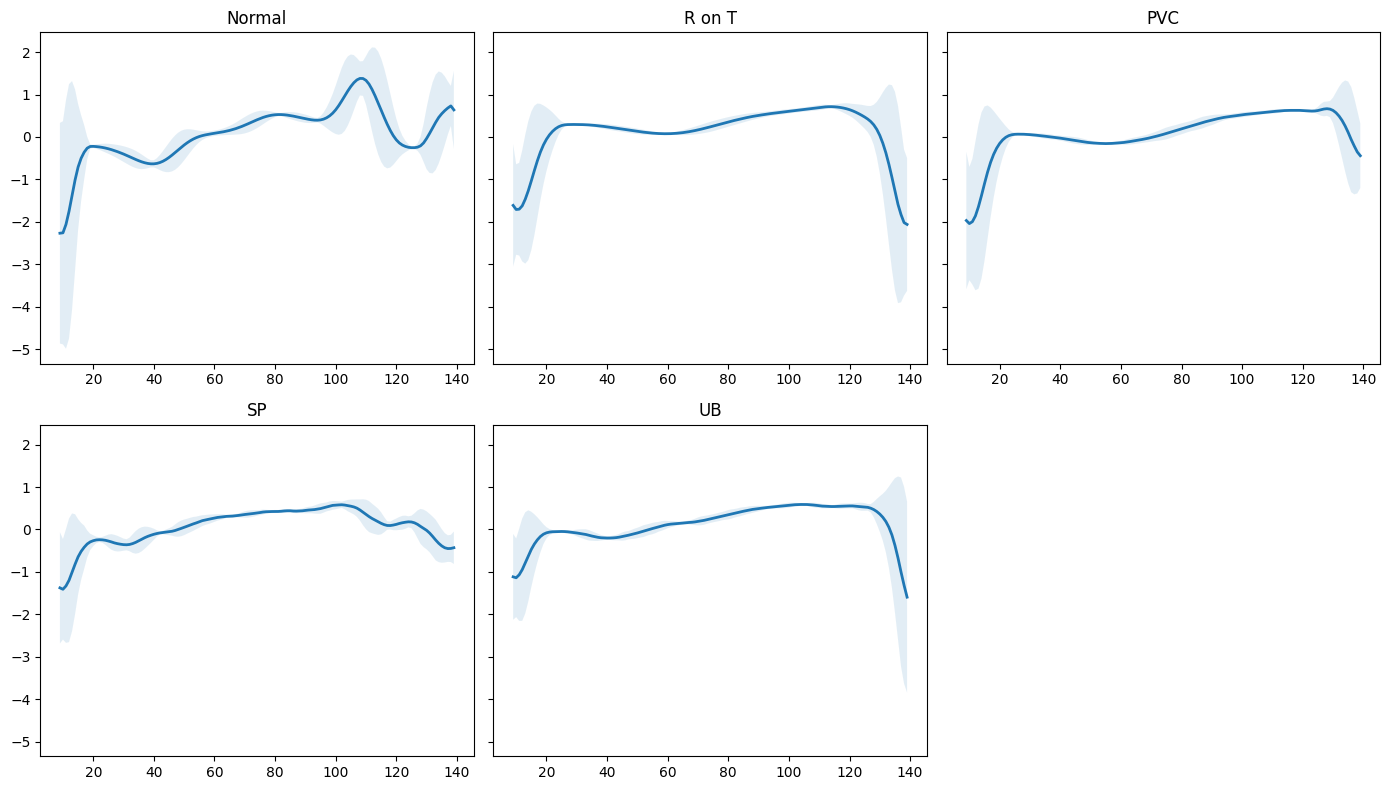

In [27]:
def plot_time_series_class(data, class_name, ax, n_steps=10):
  time_series_df = pd.DataFrame(data)

  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(smooth_path, linewidth=2)
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(class_name)
     

classes = df.target.unique()

fig, axs = plt.subplots(
  nrows=len(classes) // 3 + 1,
  ncols=3,
  sharey=True,
  figsize=(14, 8)
)

for i, cls in enumerate(classes):
  ax = axs.flat[i]
  data = df[df.target == cls] \
    .drop(labels='target', axis=1) \
    .mean(axis=0) \
    .to_numpy()
  plot_time_series_class(data, class_names[i], ax)

fig.delaxes(axs.flat[-1])
fig.tight_layout()
     

[b'1' b'2' b'4' b'5' b'3']
